/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


'0.37 is less than 0.5 which means person with 35 will not buy the insurance'

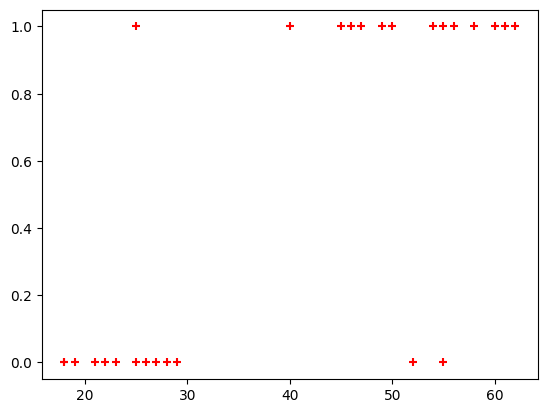

In [2]:
# -*- coding: utf-8 -*-
"""LogisticRegression_Binary.ipynb

Automatically generated by Colab.

Original file is located at
    https://colab.research.google.com/drive/1M8PXdcmPsrQtqyVXpET3sgghAMr_MCg5
"""

# Commented out IPython magic to ensure Python compatibility.
import pandas as pd
from matplotlib import pyplot as plt
# %matplotlib inline
#"%matplotlib inline" will make your plot outputs appear and be stored within the notebook.

df = pd.read_csv("/content/insurance_data.csv")
df.head()

plt.scatter(df.age,df.bought_insurance,marker='+',color='red')

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df[['age']],df.bought_insurance,train_size=0.9,random_state=10)
X_train.shape

X_test

from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

model.fit(X_train, y_train)

X_test

y_test

y_predicted = model.predict(X_test)
y_predicted

model.score(X_test,y_test)

model.predict_proba(X_test)

y_predicted = model.predict([[60]])
y_predicted

#model.coef_ indicates value of m in y=m*x + b equation
model.coef_

#model.intercept_ indicates value of b in y=m*x + b equation
model.intercept_

#Lets defined sigmoid function now and do the math with hand
import math
def sigmoid(x):
  return 1 / (1 + math.exp(-x))

def prediction_function(age):
   z = 0.127 * age - 4.973 # 0.12740563 ~ 0.0127 and -4.97335111 ~ -4.97
   y = sigmoid(z)
   return y

age = 35
prediction_function(age)

"""0.37 is less than 0.5 which means person with 35 will not buy the insurance"""

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


Accuracy of the Multinomial Logistic Regression model on the test set: 1.00


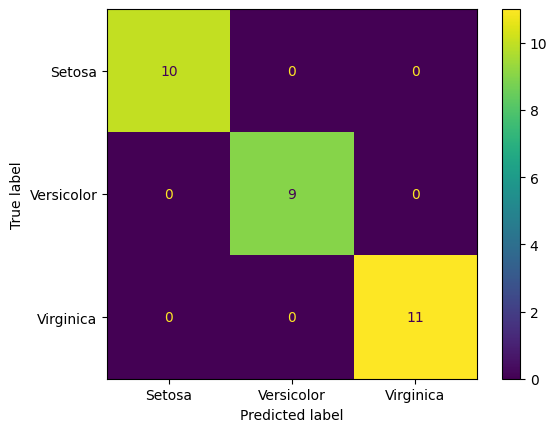

In [3]:
# -*- coding: utf-8 -*-
"""LogisticRegression_Multiclass.ipynb

Automatically generated by Colab.

Original file is located at
    https://colab.research.google.com/drive/1anBybVXILenh0a_R4aM_ZemLrEqYWnJl
"""

# Import necessary libraries
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn import metrics
import matplotlib.pyplot as plt

# Load the Iris dataset
iris =  pd.read_csv("/content/iris.csv")
iris.head()

X=iris.drop('species',axis='columns')# Features (sepal length, sepal width, petal length, petal width)
y = iris.species # Target labels (0: Setosa, 1: Versicolor, 2: Virginica)

# Split the dataset into 80% training and 20% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Multinomial Logistic Regression model
# Use 'multinomial' for multi-class classification and 'lbfgs' solver
model = LogisticRegression(multi_class='multinomial')

# Train the model on the training data
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)

# Calculate the accuracy of the model on the test data
accuracy = accuracy_score(y_test, y_pred)

# Display the accuracy
print(f"Accuracy of the Multinomial Logistic Regression model on the test set: {accuracy:.2f}")

confusion_matrix = metrics.confusion_matrix(y_test, y_pred)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = ["Setosa", "Versicolor", "Virginica"])

cm_display.plot()
plt.show()

Top factors affecting retention (correlation with leaving):
satisfaction_level    0.388375
Work_accident         0.154622
time_spend_company    0.144822
Name: left, dtype: float64


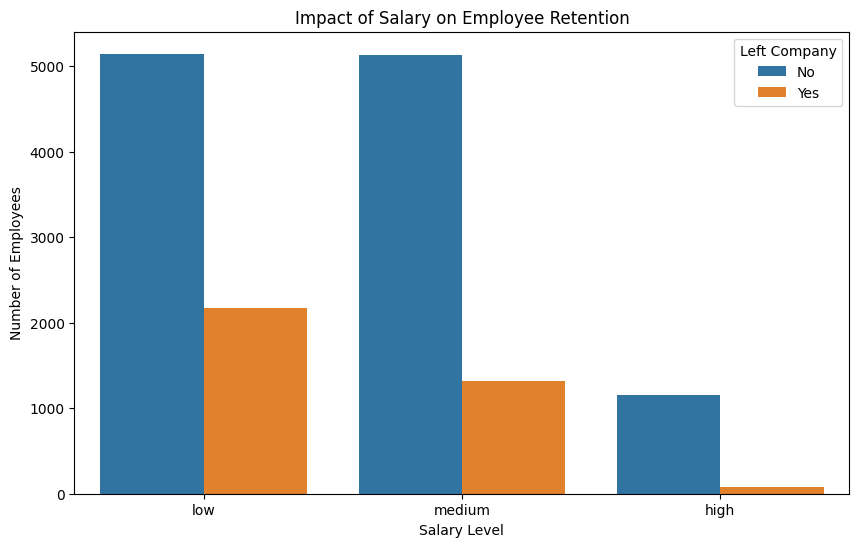

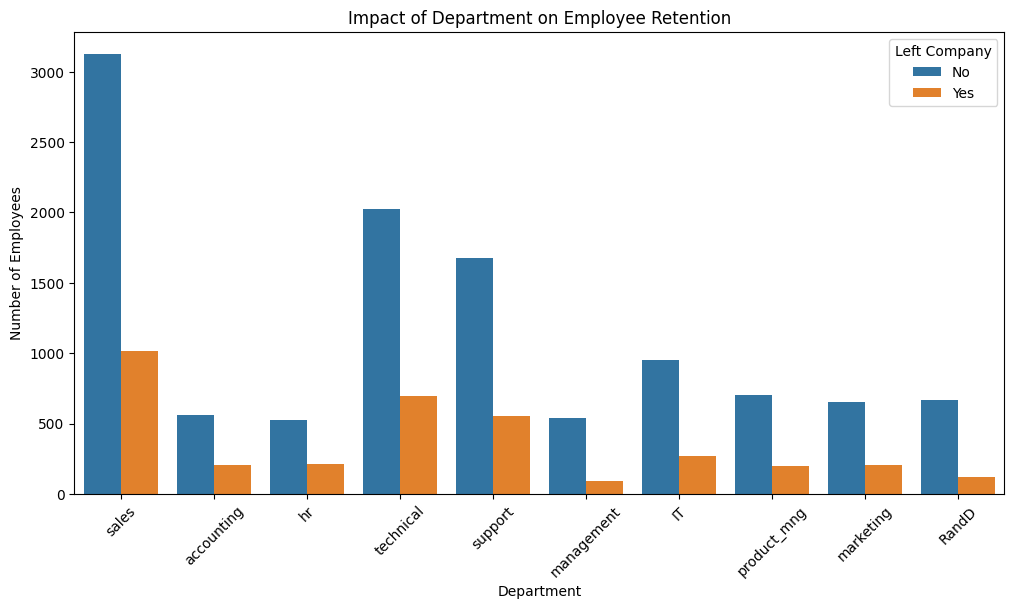

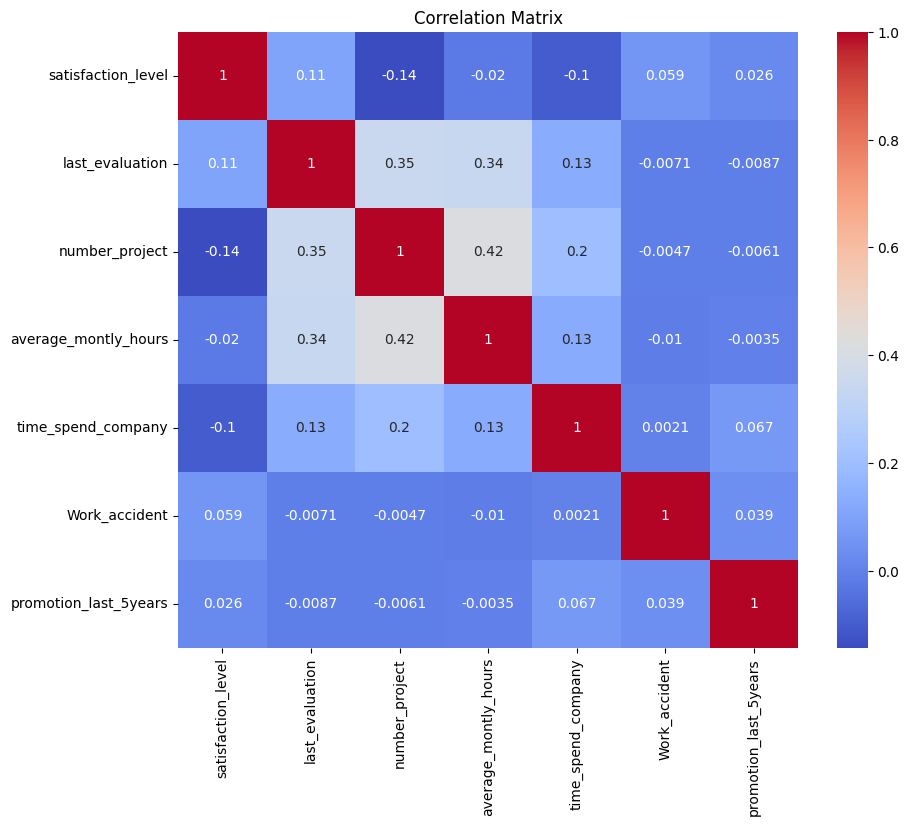


Model Evaluation:
Accuracy Score: 0.7858


In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Load the dataset
df = pd.read_csv('HR_comma_sep.csv')

# Exploratory Data Analysis
print("Top factors affecting retention (correlation with leaving):")
print(df.corr(numeric_only=True)['left'].abs().sort_values(ascending=False)[1:4])


# Convert 'left' to categorical for better visualization
df['left'] = df['left'].astype('category')

# 1. Impact of salaries on retention
plt.figure(figsize=(10, 6))
sns.countplot(x='salary', hue='left', data=df)
plt.title('Impact of Salary on Employee Retention')
plt.xlabel('Salary Level')
plt.ylabel('Number of Employees')
plt.legend(title='Left Company', labels=['No', 'Yes'])
plt.show()

# 2. Impact of department on retention
plt.figure(figsize=(12, 6))
sns.countplot(x='Department', hue='left', data=df)
plt.title('Impact of Department on Employee Retention')
plt.xlabel('Department')
plt.ylabel('Number of Employees')
plt.legend(title='Left Company', labels=['No', 'Yes'])
plt.xticks(rotation=45)
plt.show()

# Correlation analysis
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

# Based on EDA, select important features for the model
# satisfaction_level, average_monthly_hours, time_spend_company, Work_accident, promotion_last_5years, salary

# Prepare data for modeling
# Convert categorical variables to dummy variables
df = pd.get_dummies(df, columns=['salary', 'Department'], drop_first=True)

# Define features and target
X = df.drop(['left'], axis=1)
y = df['left']

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Build Logistic Regression Model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
print("\nModel Evaluation:")
print(f"Accuracy Score: {accuracy_score(y_test, y_pred):.4f}")



Columns in zoo_data: ['animal_name', 'hair', 'feathers', 'eggs', 'milk', 'airborne', 'aquatic', 'predator', 'toothed', 'backbone', 'breathes', 'venomous', 'fins', 'legs', 'tail', 'domestic', 'catsize', 'class_type']
Columns in zoo_class: ['Class_Number', 'Number_Of_Animal_Species_In_Class', 'Class_Type', 'Animal_Names']
Model Accuracy: 0.9524


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


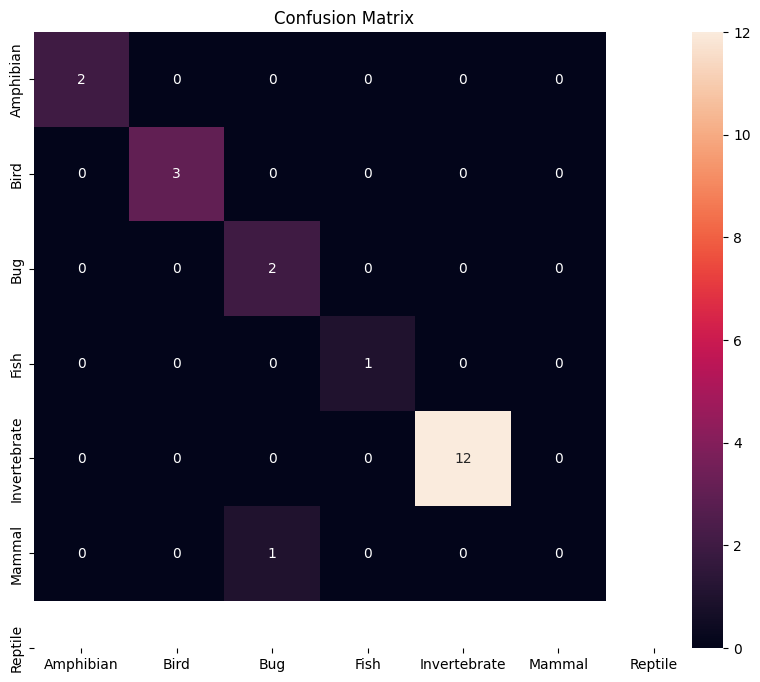

In [27]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Load datasets
zoo_data = pd.read_csv("/content/zoo-data.csv")
zoo_class = pd.read_csv("/content/zoo-class-type.csv")

# Print column names to verify
print("Columns in zoo_data:", zoo_data.columns.tolist())
print("Columns in zoo_class:", zoo_class.columns.tolist())

# Clean and prepare data
# Ensure class_type is numeric
zoo_data['class_type'] = pd.to_numeric(zoo_data['class_type'], errors='coerce')
zoo_data = zoo_data.dropna(subset=['class_type'])

# Merge with class information
zoo_data = zoo_data.merge(zoo_class, left_on='class_type', right_on='Class_Number')

# Verify all feature columns are numeric
feature_columns = ['hair', 'feathers', 'eggs', 'milk', 'airborne', 'aquatic',
                  'predator', 'toothed', 'backbone', 'breathes', 'venomous',
                  'fins', 'legs', 'tail', 'domestic', 'catsize']

# Convert all features to numeric, coercing errors to NaN
for col in feature_columns:
    zoo_data[col] = pd.to_numeric(zoo_data[col], errors='coerce')

# Drop any rows with missing values in features
zoo_data = zoo_data.dropna(subset=feature_columns)

# Prepare features and target
X = zoo_data[feature_columns]
y = zoo_data['Class_Type']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train model
model = LogisticRegression(max_iter=1000, multi_class='multinomial', solver='lbfgs')
model.fit(X_train, y_train)

# Evaluate
y_pred = model.predict(X_test)
print(f'Model Accuracy: {accuracy_score(y_test, y_pred):.4f}')

# Confusion matrix
plt.figure(figsize=(10,8))
sns.heatmap(confusion_matrix(y_test, y_pred),
            annot=True, fmt='d',
            xticklabels=model.classes_,
            yticklabels=model.classes_)
plt.title('Confusion Matrix')
plt.show()